## notebook to check the threshold s for gamma-gamma absorption for the SS Disk case

In [1]:
import sys
sys.path.append("../../")
import numpy as np
from astropy.constants import h, m_e, M_sun, c
import astropy.units as u
from agnpy.targets import SSDisk
from agnpy.absorption import sigma
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from agnpy.utils.conversion import mec2, nu_to_epsilon_prime

## disk in Finke 2016

In [2]:
# disk parameters
M_BH = 1.2 * 1e9 * M_sun.cgs
L_disk = 2 * 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_in = 6
R_out = 200
disk = SSDisk(M_BH, L_disk, eta, R_in, R_out, R_g_units=True)

### considering a single distance, $r = 10^{-1} R(Ly\alpha)$

In [3]:
# consider a fixed distance of the blob from the target fields
r = 1.1e16 * u.cm
r_tilde = (r / disk.R_g).to_value("")
print("r_tilde: ", r_tilde)

r_tilde:  62.07849948671599


In [4]:
# compute mu and energies seen at each cosine of zenith
mu = disk.evaluate_mu_from_r_tilde(disk.R_in_tilde, disk.R_out_tilde, r_tilde, size=50)
R_tilde = r_tilde * np.sqrt(mu**(-2) - 1)
# energies seen at this height, r_tilde, at each zenith angle 
epsilon = disk.epsilon_mu(mu, r_tilde)
# reshape both cosines and energies in a column
mu = np.reshape(mu, (mu.size, 1))
epsilon = np.reshape(epsilon, (epsilon.size, 1))

In [5]:
# energies of the scattering photons, as in figure 12 of Finke
E = np.logspace(0, 5) * u.GeV 
nu = E.to("Hz", equivalencies=u.spectral())
epsilon_1 = nu_to_epsilon_prime(nu)
# reshape it in a row
epsilon_1 = np.reshape(epsilon_1, (1, epsilon_1.size))

In [6]:
s = epsilon_1 * epsilon * (1 - mu) / 2

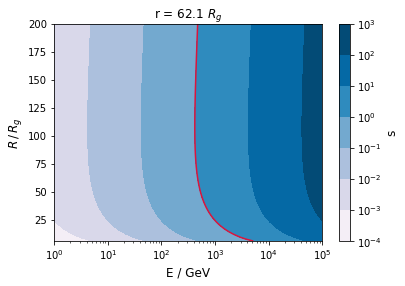

In [7]:
# plot the values
fig, ax = plt.subplots()
_E, _R_tilde = np.meshgrid(E, R_tilde)
# plot log-scaled contours
contours = ax.contourf(_E, _R_tilde, s, origin="lower", locator=ticker.LogLocator(), cmap=cm.PuBu)
# plot red line with contour at s = 1
ax.contour(_E, _R_tilde, s, origin="lower", levels=[1], colors="crimson")
cbar = fig.colorbar(contours)
cbar.set_label("s", rotation=90, fontsize=12)
ax.set_xscale("log")
ax.set_title(f"r = {r_tilde:.1f} " + r"$R_g$", fontsize=12)
ax.set_xlabel("E / GeV", fontsize=12)
ax.set_ylabel(r"$R\,/\,R_g$", fontsize=12)
plt.show()

As in Finke 2016, the absorption pf the disk becomes efficient at $\sim {\rm TeV}$ energies. Particularly for the innermost part of the disk ($R = 6 R_g$) where $s$ is above threshold for $E\sim5\,{\rm TeV}$. Which is the same value for which the absorption for the disk rises in Figure 12 of Finke 2016.